# Data Science in Telco : Data Cleansing

In [47]:
import pandas as pd
from IPython.display import display

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

df_load = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv")

# df_load.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Customer Churn Prediction using Machine Learning\File Dokumentasi\File CSV\dqlab_telco.csv", index=None, header=True)
# df_load.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Customer Churn Prediction using Machine Learning\File Dokumentasi\File Excel\dqlab_telco.xlsx", index=None, header=True)

display(df_load.head())

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
import pandas as pd
from IPython.display import display

df_load = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv")

print("Dimensi dataset adalah = %d Baris %d Kolom" %df_load.shape)
print("\n")
display(df_load.info())
display(df_load["customerID"].nunique())

Dimensi dataset adalah = 7113 Baris 22 Kolom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 


None

7017

## Memfilter ID Number Pelanggan Format Tertentu

In [49]:
df_load["valid_id"] = df_load["customerID"].astype(str).str.match(r"(45\d{9,10})")
df_load = (df_load[df_load["valid_id"] == True]).drop("valid_id",axis=1)

display(df_load.head(5))

print("Hasil jumlah ID Customer yang terfilter adalah")
display(df_load["customerID"].count())

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Hasil jumlah ID Customer yang terfilter adalah


7006

## Memfilter Duplikasi ID Number Pelanggan

In [50]:
df_load = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv")
df_load["valid_id"] = df_load["customerID"].astype(str).str.match(r"(45\d{9,10})")
df_load = (df_load[df_load["valid_id"] == True]).drop("valid_id",axis=1)

display(df_load.shape)
df_load = df_load.drop_duplicates()
display(df_load.shape)
df_load = df_load.sort_values("UpdatedAt", ascending=False).drop_duplicates(["customerID"])
display(df_load.shape)
display(df_load["customerID"].count())

(7006, 22)

(6999, 22)

(6993, 22)

6993

## Mengatasi Missing Value

In [51]:
df_load = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv")
df_load["valid_id"] = df_load["customerID"].astype(str).str.match(r"(45\d{9,10})")
df_load = (df_load[df_load["valid_id"] == True]).drop("valid_id",axis=1)

display(df_load.shape)
df_load = df_load.drop_duplicates()
display(df_load.shape)
df_load = df_load.sort_values("UpdatedAt", ascending=False).drop_duplicates(["customerID"])
display(df_load.shape)
display(df_load["customerID"].count())

print("Total missing values data dari kolom Churn : ")
display(df_load.isnull().sum())
df_load.dropna(subset=["Churn"], inplace=True)
display(df_load.isnull().sum())
display(df_load.shape)

(7006, 22)

(6999, 22)

(6993, 22)

6993

Total missing values data dari kolom Churn : 


UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn                0
dtype: int64

(6950, 22)

## Mengatasi Missing value dengan Pengisian Nilai tertentu

In [52]:
df_load["tenure"].fillna(11, inplace=True)

for col_name in list(["MonthlyCharges", "TotalCharges"]):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

display(df_load.isnull().sum().sort_values(ascending=False))

UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64

## Mendeteksi adanya Outlier (Boxplot)

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


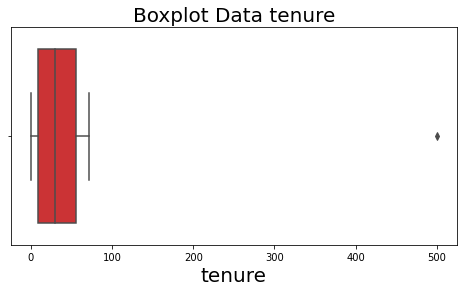

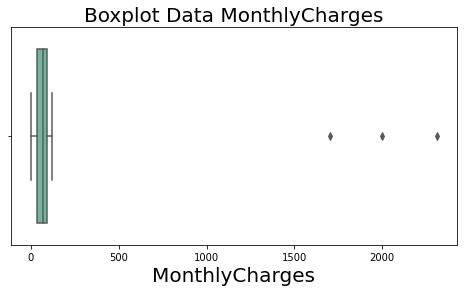

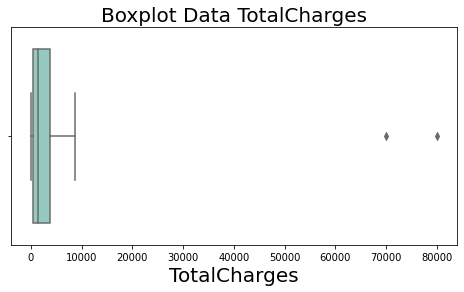

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

display(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

for i,kol in enumerate(['tenure','MonthlyCharges','TotalCharges']):
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(x=df_load[kol], palette="Set{}".format(i+1))
    plt.title("Boxplot Data {}".format(kol), fontsize=20)
    plt.xlabel("{}".format(kol), fontsize=20)
    plt.show()

## Mengatasi Outlier

tenure              9.0000
MonthlyCharges     36.4625
TotalCharges      406.9750
Name: 0.25, dtype: float64

tenure              55.0000
MonthlyCharges      89.8500
TotalCharges      3799.8375
Name: 0.75, dtype: float64

tenure              46.0000
MonthlyCharges      53.3875
TotalCharges      3392.8625
dtype: float64

,Churn,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,...,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,UpdatedAt,customerID,gender,tenure
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4722,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4729,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4728,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4727,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Churn,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,...,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,UpdatedAt,customerID,gender,tenure
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4722,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4729,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4728,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4727,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Churn,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,...,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,UpdatedAt,customerID,gender,tenure
0,No,Month-to-month,No,No,DSL,29.85,No phone service,Yes,No,Yes,...,No,0,No,No,No,29.85,202006,45759018157,Female,1.0
4722,No,One year,No,Yes,DSL,70.15,No,Yes,No,Yes,...,Yes,0,No,Yes,Yes,4224.70,202006,45758152256,Female,60.0
4734,Yes,One year,Yes,Yes,DSL,80.00,No,No,Yes,No,...,Yes,0,Yes,Yes,Yes,3182.95,202006,45410681487,Male,39.0
4733,No,Month-to-month,No,Yes,Fiber optic,84.60,No,Yes,Yes,Yes,...,Yes,0,No,No,No,959.90,202006,45131942507,Male,12.0
4732,No,Two year,Yes,No internet service,No,19.90,No,No internet service,No internet service,No,...,Yes,0,No internet service,No internet service,No internet service,1397.30,202006,45105270921,Female,71.0


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


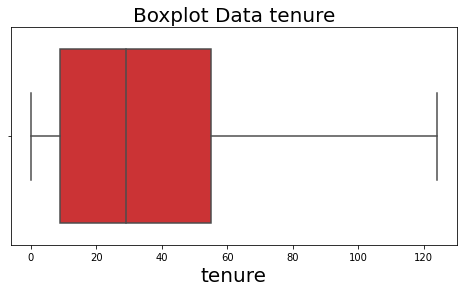

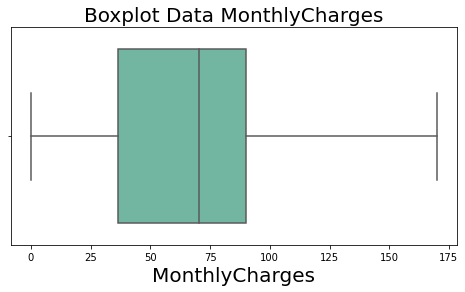

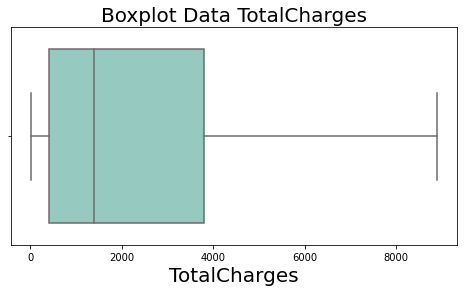

In [54]:
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1

minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)

df_load, maximum = df_load.align(maximum, axis=1, copy=False)
more_than = (df_load > maximum)
df_load, minimum = df_load.align(minimum, axis=1, copy=False)
lower_than = (df_load < minimum)

df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

display(Q1)
display(Q3)
display(IQR)
# display(minimum)
# display(maximum)
display(more_than.head(10))
display(lower_than.head(10))
display(df_load.head())
display(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

for i,kol in enumerate(['tenure','MonthlyCharges','TotalCharges']):
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(x=df_load[kol], palette="Set{}".format(i+1))
    plt.title("Boxplot Data {}".format(kol), fontsize=20)
    plt.xlabel("{}".format(kol), fontsize=20)
    plt.show()

## Mendeteksi Nilai yang tidak Standar

In [55]:
display(df_load.info())
kolom_object = df_load.dtypes[df_load.dtypes == "object"].index.to_list()
kolom_object.remove("customerID")
kolom_object.append("SeniorCitizen")
display(kolom_object)

for kol in kolom_object:
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable', kol)
    print(df_load[kol].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6950 entries, 0 to 2360
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             6950 non-null   object 
 1   Contract          6950 non-null   object 
 2   Dependents        6950 non-null   object 
 3   DeviceProtection  6950 non-null   object 
 4   InternetService   6950 non-null   object 
 5   MonthlyCharges    6950 non-null   float64
 6   MultipleLines     6950 non-null   object 
 7   OnlineBackup      6950 non-null   object 
 8   OnlineSecurity    6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  Partner           6950 non-null   object 
 11  PaymentMethod     6950 non-null   object 
 12  PhoneService      6950 non-null   object 
 13  SeniorCitizen     6950 non-null   int64  
 14  StreamingMovies   6950 non-null   object 
 15  StreamingTV       6950 non-null   object 
 16  TechSupport       6950 non-null   object 


None

['Churn',
 'Contract',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'gender',
 'SeniorCitizen']


Unique Values Count Before Standardized  Variable Churn
No       5114
Yes      1827
Churn       9
Name: Churn, dtype: int64

Unique Values Count Before Standardized  Variable Contract
Month-to-month    3823
Two year          1670
One year          1457
Name: Contract, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable DeviceProtection
No                     3054
Yes                    2391
No internet service    1505
Name: DeviceProtection, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable OnlineBacku

## Menstandarisasi Variable Kategorik

In [56]:
kolom_object = df_load.dtypes[df_load.dtypes == "object"].index.to_list()
kolom_object.remove("customerID")
kolom_object.append("SeniorCitizen")

df_load = df_load.replace(["Churn", "Iya", "Laki-Laki", "Wanita"],["Yes", "Yes", "Male", "Female"])

for kol in kolom_object:
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0m Variable', kol)
    print(df_load[kol].value_counts())


Unique Values Count After Standardized  Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64

Unique Values Count After Standardized  Variable Contract
Month-to-month    3823
Two year          1670
One year          1457
Name: Contract, dtype: int64

Unique Values Count After Standardized  Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized  Variable DeviceProtection
No                     3054
Yes                    2391
No internet service    1505
Name: DeviceProtection, dtype: int64

Unique Values Count After Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count After Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count After Standardized  Variable OnlineBackup
No                     3045
Yes    

# Customer Churn Prediction using Machine Learning 

## Import Library yang dibutuhkan

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

from IPython.display import display

## Data

In [58]:
df_load = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv")

# df_load.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Customer Churn Prediction using Machine Learning\File Dokumentasi\File CSV\dqlab_telco_final.csv", index=None, header=True)
# df_load.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Customer Churn Prediction using Machine Learning\File Dokumentasi\File Excel\dqlab_telco_final.xlsx", index=None, header=True)

display(df_load.head())

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [59]:
df_load = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv")
print("Dimensi dataset adalah %d Baris & %d Kolom"%df_load.shape)
display(df_load.info())
display(df_load.head())
display(df_load["customerID"].nunique())

Dimensi dataset adalah 6950 Baris & 13 Kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


None

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


6950

## Exploratory Data Analysis

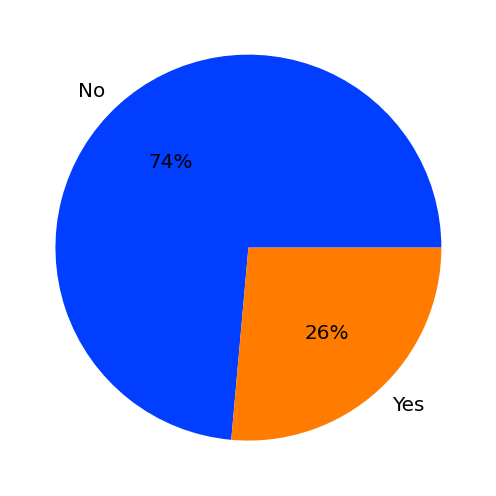

In [60]:
data = df_load["Churn"].value_counts()
labels = list(df_load["Churn"].unique())
colors = sns.color_palette('bright')[0:df_load["Churn"].nunique()]

plt.figure(figsize=(7, 7))
plt.pie(data, labels=labels, colors=colors, autopct = "%.0f%%", textprops={"fontsize" : 20})
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) Variabel Numerik

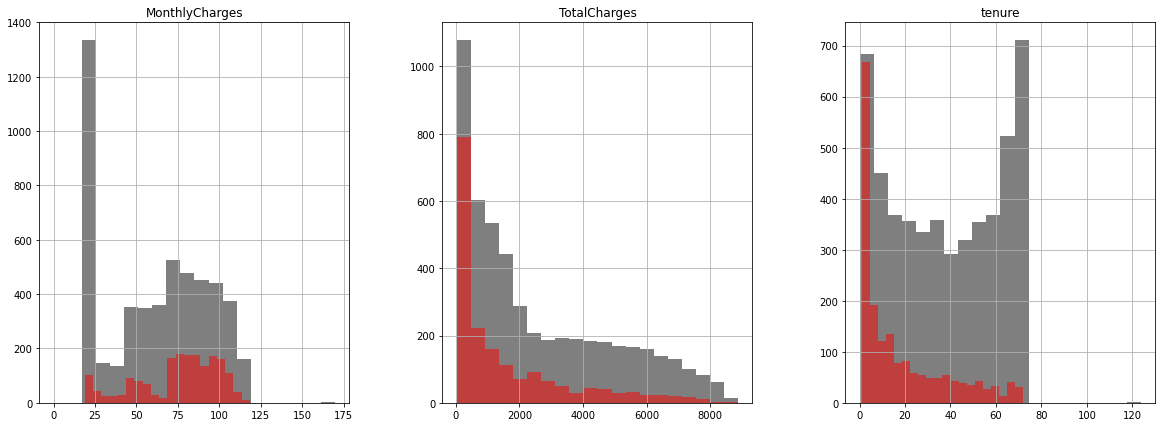

In [61]:
numerical_features = ["MonthlyCharges", "TotalCharges", "tenure"]

fig, ax = plt.subplots(1, 3, figsize=(20, 7))
df_load[df_load["Churn"] == "No"][numerical_features].hist(bins=20, color="black", alpha=0.5, ax=ax)
df_load[df_load["Churn"] == "Yes"][numerical_features].hist(bins=20, color="red", alpha=0.5, ax=ax)
plt.show()

## Exploratory Data Analysis (EDA) Variabel Kategorik

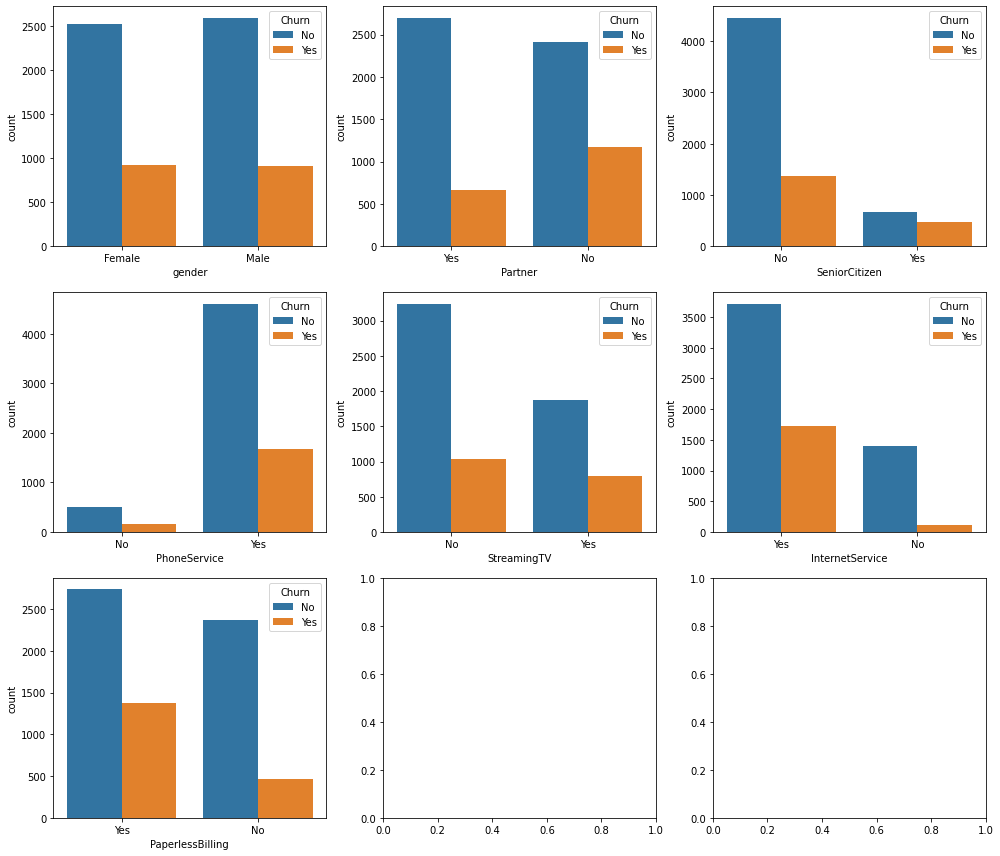

In [62]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x="gender", hue="Churn", ax=ax[0][0])
sns.countplot(data=df_load, x="Partner", hue="Churn", ax=ax[0][1])
sns.countplot(data=df_load, x="SeniorCitizen", hue="Churn", ax=ax[0][2])
sns.countplot(data=df_load, x="PhoneService", hue="Churn", ax=ax[1][0])
sns.countplot(data=df_load, x="StreamingTV", hue="Churn", ax=ax[1][1])
sns.countplot(data=df_load, x="InternetService", hue="Churn", ax=ax[1][2])
sns.countplot(data=df_load, x="PaperlessBilling", hue="Churn", ax=ax[2][0])
plt.tight_layout()
plt.show()

## Menghapus Unnecessary Columns dari data

In [63]:
cleaned_df = df_load.drop(["customerID", "UpdatedAt"], axis=1)
display(cleaned_df.head())

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


## Encoding Data

In [73]:
df_load = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv")
cleaned_df = df_load.drop(["customerID", "UpdatedAt"], axis=1)

kolom_object = []
kolom_numerik = []
for kolom in cleaned_df.columns:
    if cleaned_df[kolom].dtypes == "int64" or  cleaned_df[kolom].dtypes == "float64":
        kolom_numerik.append(kolom)
        continue
    LE = LabelEncoder()
    cleaned_df[kolom] = LE.fit_transform(cleaned_df[kol])
    kolom_object.append(kolom)

display(cleaned_df[kolom_object].describe())
display(cleaned_df[kolom_numerik].describe())
display(cleaned_df.info())

,gender,SeniorCitizen,Partner,PhoneService,StreamingTV,InternetService,PaperlessBilling,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.162302,0.162302,0.162302,0.162302,0.162302,0.162302,0.162302,0.162302
std,0.368754,0.368754,0.368754,0.368754,0.368754,0.368754,0.368754,0.368754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6950 non-null   int32  
 1   SeniorCitizen     6950 non-null   int32  
 2   Partner           6950 non-null   int64  
 3   tenure            6950 non-null   int64  
 4   PhoneService      6950 non-null   int64  
 5   StreamingTV       6950 non-null   int64  
 6   InternetService   6950 non-null   int64  
 7   PaperlessBilling  6950 non-null   int64  
 8   MonthlyCharges    6950 non-null   float64
 9   TotalCharges      6950 non-null   float64
 10  Churn             6950 non-null   int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 543.1 KB


None

## Splitting Dataset

In [ ]:
X = cleaned_df.drop("Churn", axis=1)
y = cleaned_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)